## **1.Predict the closing price of a stock or index based on last 10 days of closing prices.**

 – Use 1 year or two years’ data as the training set.

 – Use both Normal Equation Method and Gradient Descent Method.

 – See if you get the same answer using both methods.

 – See how your answers evolve as you play with different values of α and criterion for 
determining convergence.

 – Plot your model performance together with real data for 6 months for your choice of α

In [96]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt

In [97]:
#Fetch Data
specified_date = datetime(2023, 9, 24)
start = specified_date - timedelta(days=730)
end = specified_date - timedelta(days=180)
AAPL = yf.download('AAPL', start, end)
AAPL.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-24,145.660004,147.470001,145.559998,146.919998,145.239700,53477900
2021-09-27,145.470001,145.960007,143.820007,145.369995,143.707397,74150700
2021-09-28,143.250000,144.750000,141.690002,141.910004,140.287018,108972300
2021-09-29,142.470001,144.449997,142.029999,142.830002,141.196472,74602000
2021-09-30,143.660004,144.380005,141.279999,141.500000,139.881683,89056700


In [98]:
df = pd.DataFrame(AAPL.Close)
len(df)

378

In [99]:
# Generate a 10-day lagged value for training machine learning models.
def data(df, gap = 10):
    X_train, y_train = [],[]
    for i in range(len(df)-gap):
        X_train.append(df['Close'].iloc[i:i+gap].values)
        y_train.append(df['Close'].iloc[i+gap])
    return pd.DataFrame(X_train), pd.Series(y_train)

X_train, y_train = data(df)

In [100]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,153.887473,153.902880,153.923587,153.961467,153.994538,154.037745,154.082935,154.133723,154.182147,154.231739
std,13.081345,13.076455,13.068937,13.054215,13.041347,13.026170,13.015398,12.993376,12.977904,12.966089
min,125.019997,125.019997,125.019997,125.019997,125.019997,125.019997,125.019997,125.019997,125.019997,125.019997
25%,144.155003,144.155003,144.155003,144.272495,144.440002,144.722504,144.829998,144.862495,144.989998,145.239998
50%,151.245003,151.284996,151.389999,151.545006,151.600006,151.665001,151.744995,151.839996,151.989998,152.199997
75%,164.855003,164.855003,164.855003,164.855003,164.855003,164.855003,164.855003,164.855003,164.855003,164.855003
max,182.009995,182.009995,182.009995,182.009995,182.009995,182.009995,182.009995,182.009995,182.009995,182.009995


In [101]:
X_train[0]
type(X_train)
X_train = X_train.values
X_train.shape[1]

10

In [102]:
y_train.describe()

count    368.000000
mean     154.272473
std       12.955163
min      125.019997
25%      145.362503
50%      152.354996
75%      164.855003
max      182.009995
dtype: float64

In [25]:
y_train = y_train.values

In [26]:
y_train[0]

142.89999389648438

### Gradient Descent

In [27]:
def cost_function(X, y, w, b):
    m = X.shape[0]
    cost = 0
    
    for i in range (m):
        f_wb = np.dot(X[i], w) + b
        cost += (f_wb - y[i])**2
        
    total_cost = cost/(2*m)
    return total_cost

def gradient_descent(X, y, w, b):
    m,n = X.shape
    dj_dw = np.zeros(n,)
    dj_db = 0.
    
    for i in range(m):
        error = np.dot(X[i],w) + b - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + error * X[i,j]
        dj_db = dj_db + error
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

def gradient_function(X, y, w, b, alpha, iterations,gradient_descent,cost_function):
    J_history = []
    
    for i in range(iterations):
        dj_dw, dj_db = gradient_descent(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 10000:
            J_history.append(cost_function(X, y, w, b))
        if i % (iterations//10) == 0:
            print(i, J_history[-1])
            
    return w,b,J_history


In [28]:
b_in = 0.
w_in = np.zeros(X_train.shape[1],)
alpha = 0.00000835
iterations = 50000
w_final, b_final, J_hist = gradient_function(X_train, y_train, w_in, b_in, alpha, iterations, gradient_descent,cost_function)
print(w_final, b_final)

0 11842.181972819059
5000 6.029090324504339
10000 5.40258195250923
15000 5.40258195250923
20000 5.40258195250923
25000 5.40258195250923
30000 5.40258195250923
35000 5.40258195250923
40000 5.40258195250923
45000 5.40258195250923
[-0.01267272  0.05797589 -0.04572824 -0.00915673 -0.05493214  0.07580223
 -0.00121348  0.02589478  0.03654299  0.92747243] 0.01572724641943894


In [32]:
from datetime import datetime, timedelta
specified_date = datetime(2023, 9, 24)
start_test = specified_date  - timedelta(days = 180)
end_test = specified_date - timedelta(days = 0)

AAPL_test = yf.download('AAPL', start_test, end_test)
AAPL_test

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-28,157.970001,158.490005,155.979996,157.649994,157.219925,45992200
2023-03-29,159.369995,161.050003,159.350006,160.770004,160.331436,51305700
2023-03-30,161.529999,162.470001,161.270004,162.360001,161.917099,49501700
2023-03-31,162.440002,165.000000,161.910004,164.899994,164.450150,68749800
2023-04-03,164.270004,166.289993,164.220001,166.169998,165.716690,56976200
...,...,...,...,...,...,...
2023-09-18,176.479996,179.380005,176.169998,177.970001,177.970001,67257600
2023-09-19,177.520004,179.630005,177.130005,179.070007,179.070007,51826900
2023-09-20,179.259995,179.699997,175.399994,175.490005,175.490005,58436200


In [33]:
df_test = pd.DataFrame(AAPL_test.Close)
df_test

,Close
Date,
2023-03-28,157.649994
2023-03-29,160.770004
2023-03-30,162.360001
2023-03-31,164.899994
2023-04-03,166.169998
...,...
2023-09-18,177.970001
2023-09-19,179.070007
2023-09-20,175.490005


In [34]:
def data(df_test, gap = 10):
    X_test, y_test = [],[]
    for i in range(len(df_test)-gap):
        X_test.append(df_test['Close'].iloc[i:i+gap].values)
        y_test.append(df_test['Close'].iloc[i+gap])
    return pd.DataFrame(X_test), pd.Series(y_test)

X_test, y_test = data(df_test)

In [35]:
X_test = X_test.values
X_test[10]

array([160.1000061 , 165.55999756, 165.21000671, 165.22999573,
       166.47000122, 167.63000488, 166.6499939 , 165.02000427,
       165.33000183, 163.77000427])

In [36]:
type(y_test)
y_test = y_test.values
len(y_test)

114

In [37]:
m = X_test.shape[0]
y_predict = np.zeros(m,)
for i in range(m):
    y_predict[i] = np.dot(w_final, X_test[i]) + b_final
print(y_predict[1:10])


[160.00447704 165.25915429 164.95189558 165.18098536 166.21195724
 167.99382153 166.73167744 165.17740193 165.19999721]


In [38]:
r2 = r2_score(y_test, y_predict)
r2

0.932751203564466

In [39]:
len(y_predict)

114

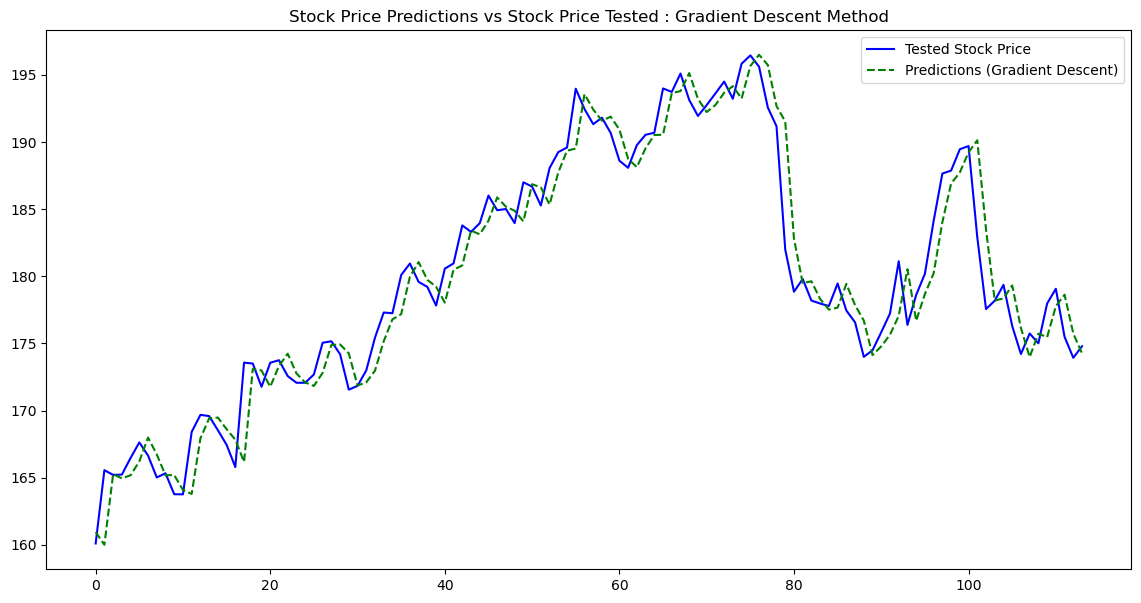

In [41]:
# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test, label="Tested Stock Price", color="blue")
plt.plot(y_predict, label="Predictions (Gradient Descent)", color="green", linestyle="--")
plt.legend()
plt.title("Stock Price Predictions vs Stock Price Tested : Gradient Descent Method")
plt.show()

In [42]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict)), ".3f"))
MSE= mean_squared_error(y_test, y_predict)
MAE= mean_absolute_error(y_test, y_predict)
r2= r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 2.331 
MSE = 5.432708798648557 
MAE = 1.687911205854015 
R2 = 0.932751203564466


## **Normal Equation**

In [43]:
X_train = np.hstack([X_train, np.ones_like(X_train)])
X_train

array([[146.91999817, 145.36999512, 141.91000366, ...,   1.        ,
          1.        ,   1.        ],
       [145.36999512, 141.91000366, 142.83000183, ...,   1.        ,
          1.        ,   1.        ],
       [141.91000366, 142.83000183, 141.5       , ...,   1.        ,
          1.        ,   1.        ],
       ...,
       [150.58999634, 148.5       , 150.47000122, ...,   1.        ,
          1.        ,   1.        ],
       [148.5       , 150.47000122, 152.58999634, ...,   1.        ,
          1.        ,   1.        ],
       [150.47000122, 152.58999634, 152.99000549, ...,   1.        ,
          1.        ,   1.        ]])

In [44]:
w = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
print(w.reshape(1,-1))
w[1:11]

[[-0.0482739   0.09439403 -0.07995529  0.03184879 -0.0985945   0.1134461
  -0.03198492  0.08435436 -0.07484807  0.97792284  0.49252359  0.49252359
   0.49252359  0.49252359  0.49252359  0.49252359  0.49252359  0.49252359
   0.49252359  0.49252359]]


array([ 0.09439403, -0.07995529,  0.03184879, -0.0985945 ,  0.1134461 ,
       -0.03198492,  0.08435436, -0.07484807,  0.97792284,  0.49252359])

In [45]:
y_pre = X_test.dot(w[1:11])
print(y_pre)

[243.63323487 242.48001344 244.15461212 249.76193589 248.71753943
 250.10395375 251.39187395 252.90815305 250.41386967 249.25462171
 248.41659602 247.31010586 249.56491284 254.4483982  255.53599649
 255.15674981 253.7585777  252.20561407 254.24927251 261.75515141
 259.7046061  259.92342397 261.65499873 262.06898375 260.02104554
 259.66744108 259.49727105 261.79145681 264.15924461 263.42889695
 261.52632388 259.25485683 260.34337856 262.20914807 265.44411161
 266.82212043 268.67651442 272.06674359 272.24920763 270.64063771
 269.50059893 269.68048619 272.57527129 274.06999966 276.73703847
 276.35044897 278.88104719 279.80891053 279.14885184 278.28246267
 279.0268163  281.92898077 280.60173352 280.99778931 284.02659789
 285.77312291 287.97469003 291.56084561 289.29357953 289.0241093
 288.84669471 286.78427027 284.2360452  284.83969981 286.57249267
 287.61704245 289.33063047 292.39231765 292.86754862 293.49276239
 290.59203013 290.29752826 291.14508782 292.67814807 292.33302867
 292.783542

In [46]:
print(y_test)

[160.1000061  165.55999756 165.21000671 165.22999573 166.47000122
 167.63000488 166.6499939  165.02000427 165.33000183 163.77000427
 163.75999451 168.41000366 169.67999268 169.58999634 168.53999329
 167.44999695 165.78999329 173.57000732 173.5        171.77000427
 173.55999756 173.75       172.57000732 172.07000732 172.07000732
 172.69000244 175.05000305 175.16000366 174.19999695 171.55999756
 171.83999634 172.99000549 175.42999268 177.30000305 177.25
 180.08999634 180.94999695 179.58000183 179.21000671 177.82000732
 180.57000732 180.96000671 183.78999329 183.30999756 183.94999695
 186.00999451 184.91999817 185.00999451 183.96000671 187.
 186.67999268 185.27000427 188.05999756 189.25       189.58999634
 193.97000122 192.46000671 191.33000183 191.80999756 190.67999268
 188.61000061 188.08000183 189.77000427 190.53999329 190.69000244
 193.99000549 193.72999573 195.1000061  193.13000488 191.94000244
 192.75       193.61999512 194.5        193.22000122 195.83000183
 196.44999695 195.610000

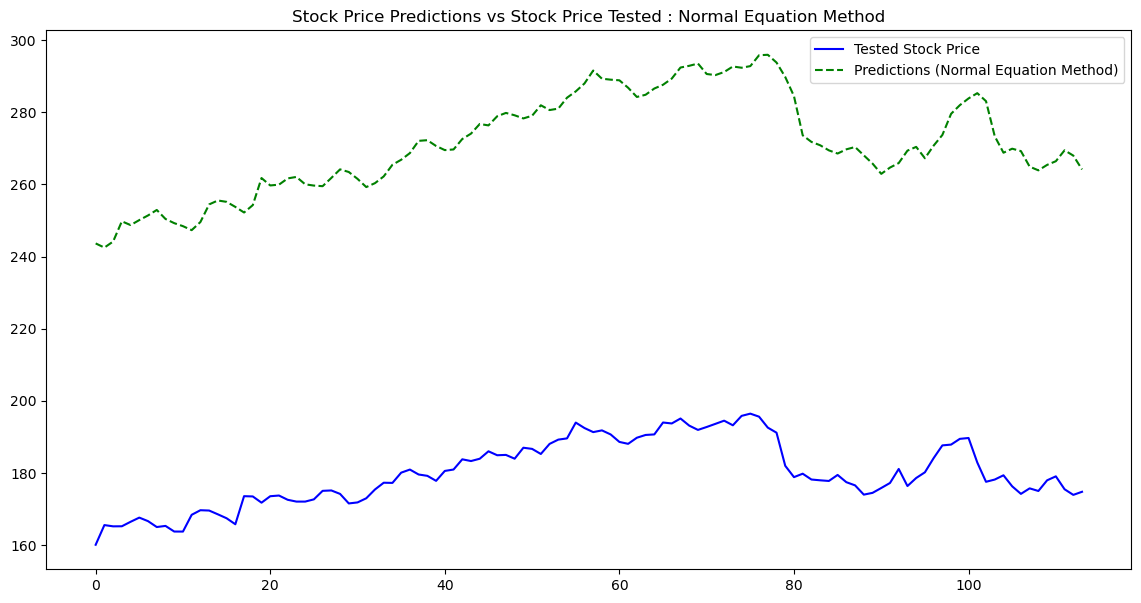

In [47]:
# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test, label="Tested Stock Price", color="blue")
plt.plot(y_pre, label="Predictions (Normal Equation Method)", color="green",linestyle="--")
plt.legend()
plt.title("Stock Price Predictions vs Stock Price Tested : Normal Equation Method")
plt.show()

In [48]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_pre)), ".3f"))
MSE= mean_squared_error(y_test, y_pre)
MAE= mean_absolute_error(y_test, y_pre)
r2= r2_score(y_test, y_pre)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 91.469 
MSE = 8366.532502043712 
MAE = 91.27146170202613 
R2 = -102.56513885691409


### **2. Predict whether the next closing price will be higher than 2% of the previous closing price.**

– Python is preferred.

– Use 1 year or two years’ data as the training set.

– See how your answers evolve as you play with different values of α and criterion for 
determining convergence.

– Plot your model performance together with real data for 6 months for your choice of α.

In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime
import numpy as np

In [59]:
#Fetch Data
specified_date = datetime(2023, 9, 24)
start = specified_date - timedelta(days=730)
end = specified_date - timedelta(days=180)
AAPL = yf.download('AAPL', start, end)
df_test = pd.DataFrame(AAPL.Close)

[*********************100%%**********************]  1 of 1 completed


In [60]:
df_test.head()

,Close
Date,
2021-09-24,146.919998
2021-09-27,145.369995
2021-09-28,141.910004
2021-09-29,142.830002
2021-09-30,141.500000


In [61]:
# Generate y train dataset for training machine learning models.
y_train = (df_test['Close'].shift(-1) > df_test['Close']*1.02).astype(int)
y_train.dropna(inplace = True)
y_train = y_train.values
y_train.reshape(1,-1)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [62]:
sum(y_train)/len(y_train)

0.15873015873015872

In [63]:
X_train = df['Close'].values
X_train.reshape(-1,1)


array([[146.91999817],
       [145.36999512],
       [141.91000366],
       [142.83000183],
       [141.5       ],
       [142.6499939 ],
       [139.13999939],
       [141.11000061],
       [142.        ],
       [143.28999329],
       [142.8999939 ],
       [142.80999756],
       [141.50999451],
       [140.91000366],
       [143.75999451],
       [144.83999634],
       [146.55000305],
       [148.75999451],
       [149.25999451],
       [149.47999573],
       [148.69000244],
       [148.63999939],
       [149.32000732],
       [148.8500061 ],
       [152.57000732],
       [149.80000305],
       [148.96000671],
       [150.02000427],
       [151.49000549],
       [150.96000671],
       [151.27999878],
       [150.44000244],
       [150.80999756],
       [147.91999817],
       [147.86999512],
       [149.99000549],
       [150.        ],
       [151.        ],
       [153.49000549],
       [157.86999512],
       [160.55000305],
       [161.02000427],
       [161.41000366],
       [161

### **Logistic Regression**

In [64]:
def sigmoid(Z):
    g = 1 / (1+np.exp(-Z))
    return g

def compute_cost_logistic(X,y,w,b):
    m = X.shape[0]
    cost = 0.
    
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        cost += (-y[i]*np.log(f_wb_i))-(1-y[i])*np.log(1-f_wb_i)
    total_cost = cost/m
    return total_cost

def compute_gradient(X,y,w,b):
    m = 378
    dj_dw = 0.
    dj_db = 0.
    
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        error = f_wb_i - y[i]
        dj_dw = dj_dw + error * X[i]
        dj_db = dj_db + error
    dj_db = dj_db / m
    dj_dw = dj_dw / m
    
    return dj_db, dj_dw

def gradient_descent(X,y,w,b,alpha,iterations):
    J_history = []
    for i in range(iterations):
        dj_db, dj_dw = compute_gradient(X,y,w,b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 100000:
            J_history.append(compute_cost_logistic(X,y,w,b))
        if i % (iterations//10) == 0:
            print(i, J_history[-1])
            
    return w,b,J_history

In [65]:
w_in = np.zeros(1,)
b_in = 0
alpha = 0.00087
iterations = 150000

w_final, b_final, J_hist = gradient_descent(X_train, y_train, w_in, b_in, alpha, iterations)
print(w_final, b_final)

0 [1.10799577]
15000 [0.50045604]
30000 [0.50040777]
45000 [0.50036025]
60000 [0.50031347]
75000 [0.50026742]
90000 [0.50022209]
105000 [0.49393574]
120000 [0.49393574]
135000 [0.49393574]
[-0.01928325] [0.20007008]


In [66]:
def predict(X,w,b):
    m = X.shape[0]
    p = []

    for i in range(m):
        w = np.ones_like(X[i]) * w_in 
        f_wb = sigmoid(np.dot(X[i],w)+b)
        if f_wb < 0.5:
            p.append(0)
        else:
            p.append(1)
    return np.array(p)

In [76]:
w_in = -0.01928325
y_pred = predict(X_test, w_in , b_final)
print(y_pred)
len(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


124

In [68]:
start_test = specified_date - timedelta(days = 180)
end_test = specified_date - timedelta(days = 0)

In [69]:
AAPL = yf.download('AAPL', start_test, end_test)
df_test = pd.DataFrame(AAPL.Close)
df_test.shape

[*********************100%%**********************]  1 of 1 completed


(124, 1)

In [77]:
y_test = (df_test['Close'].shift(-1) > df_test['Close']*1.02).astype(int)
len(y_test)

124

In [71]:
y_test.dropna(inplace = True)

In [72]:
y_test = y_test.values
y_test.shape

(124,)

In [78]:
X_test = df_test['Close'].values

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Retrieve the probability of the positive class 

# Calculate various evaluation metrics.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Output the evaluation metrics.
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Output the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.9516129032258065
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[118   0]
 [  6   0]]


/Users/lilyhuang/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


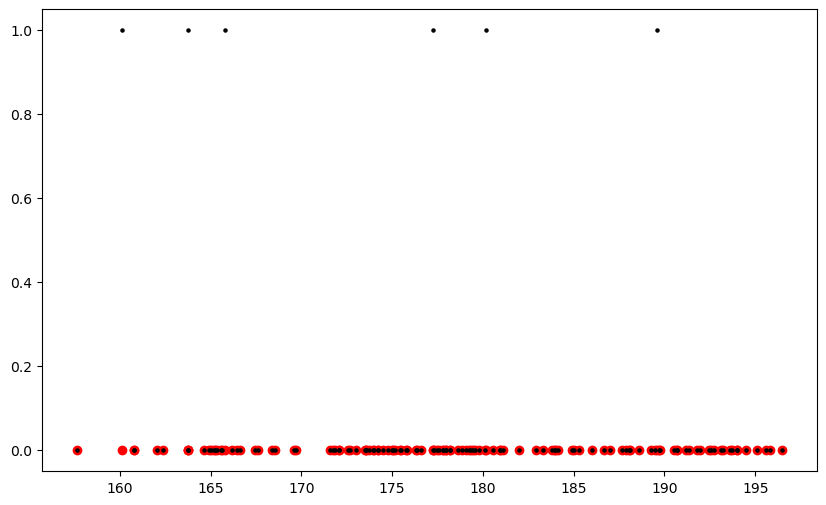

In [80]:
plt.figure(figsize = (10,6))
plt.scatter(X_test,y_test, color = 'black', zorder = 10, s = 5)
plt.scatter(X_test, y_pred, color = 'red')

plt.show()

In [81]:
cm = confusion_matrix(y_test, y_pred)

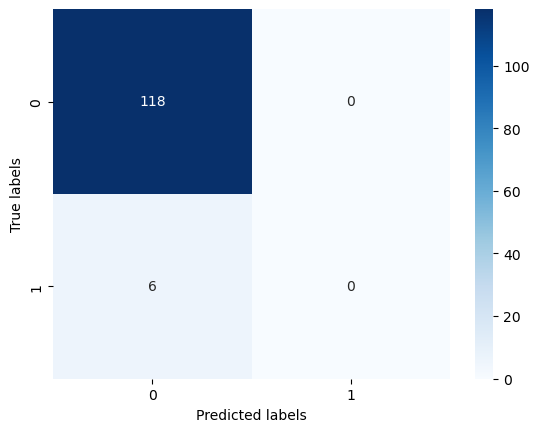

In [82]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### **Scikit learn**

In [83]:
from sklearn.linear_model import LogisticRegression
X_train = X_train.reshape(-1,1)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [84]:
print(lr_model.coef_,lr_model.intercept_)

[[-0.01092999]] [-6.84499266e-05]


In [85]:
from sklearn.linear_model import LogisticRegression
X_test = X_test.reshape(-1,1)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_prediction = lr_model.predict(X_test)

In [86]:
len(y_pred)

124

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score


# Calculate various evaluation metrics.
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction)
recall = recall_score(y_test, y_prediction)
f1 = f1_score(y_test, y_prediction)

# Output the evaluation metrics.
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Output the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9516129032258065
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[118   0]
 [  6   0]]


/Users/lilyhuang/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
cm = confusion_matrix(y_test, y_pred)

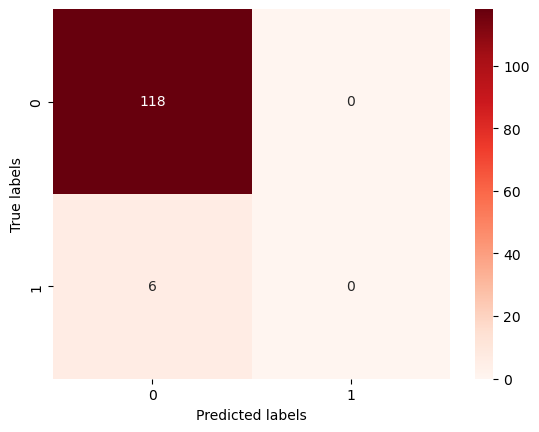

In [90]:
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()